In [1]:
!pip install numpy gymnasium matplotlib

In [12]:
!pip install google

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os


os.makedirs('/content/drive/MyDrive/Colab Notebooks/agent_frozen_lake', exist_ok=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/agent_frozen_lake')

In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import math
import imageio

In [4]:
# Environtment
env = gym.make("FrozenLake-v1", desc=None, map_name="8x8", is_slippery=True, render_mode="rgb_array")
state_size = env.observation_space.n
action_size = env.action_space.n
q_grid = np.zeros((state_size, action_size))

In [15]:
# Parameters
epsilon_min = 0.05
epsilon_max = 1.0
epsilon_decay_rate = 0.0005
epsilon = 1.0
alpha = 0.15
gamma = 0.99
episodes = 50000
max_steps = 200
log_interval = 500

episode_rewards = []
episode_steps = []

In [17]:
for episode in range(episodes):
    state, _ = env.reset()
    cumulative_reward = 0
    step_count = 0
    done = False

    while not done and step_count < max_steps:
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_grid[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        current_q = q_grid[state, action]
        next_max_q = np.max(q_grid[next_state])

        # Bellman equation
        new_q = current_q + alpha * (reward + gamma * next_max_q - current_q)
        q_grid[state, action] = new_q

        state = next_state
        cumulative_reward += reward
        step_count += 1

    # Exponential epsilon decay
    epsilon = epsilon_min + (epsilon_max - epsilon_min) * np.exp(-epsilon_decay_rate * episode)

    episode_rewards.append(cumulative_reward)
    episode_steps.append(step_count)

    if (episode + 1) % log_interval == 0:
        avg_reward = np.mean(episode_rewards[-log_interval:])
        print(f"Episode: {episode + 1}, Average reward: {avg_reward:.4f}, Epsilon: {epsilon:.4f}")

print("Q-grid:")
print(q_grid)

Episode: 500, Average reward: 0.0040, Epsilon: 0.7902
Episode: 1000, Average reward: 0.0140, Epsilon: 0.6265
Episode: 1500, Average reward: 0.0420, Epsilon: 0.4990
Episode: 2000, Average reward: 0.0520, Epsilon: 0.3997
Episode: 2500, Average reward: 0.0740, Epsilon: 0.3223
Episode: 3000, Average reward: 0.1060, Epsilon: 0.2621
Episode: 3500, Average reward: 0.1680, Epsilon: 0.2152
Episode: 4000, Average reward: 0.2380, Epsilon: 0.1786
Episode: 4500, Average reward: 0.2180, Epsilon: 0.1502
Episode: 5000, Average reward: 0.2700, Epsilon: 0.1280
Episode: 5500, Average reward: 0.2860, Epsilon: 0.1108
Episode: 6000, Average reward: 0.3120, Epsilon: 0.0973
Episode: 6500, Average reward: 0.3520, Epsilon: 0.0869
Episode: 7000, Average reward: 0.4280, Epsilon: 0.0787
Episode: 7500, Average reward: 0.3320, Epsilon: 0.0724
Episode: 8000, Average reward: 0.3740, Epsilon: 0.0674
Episode: 8500, Average reward: 0.3800, Epsilon: 0.0636
Episode: 9000, Average reward: 0.4000, Epsilon: 0.0606
Episode: 95

Number of episodes: 53127
Smoothed rewards count: 53127


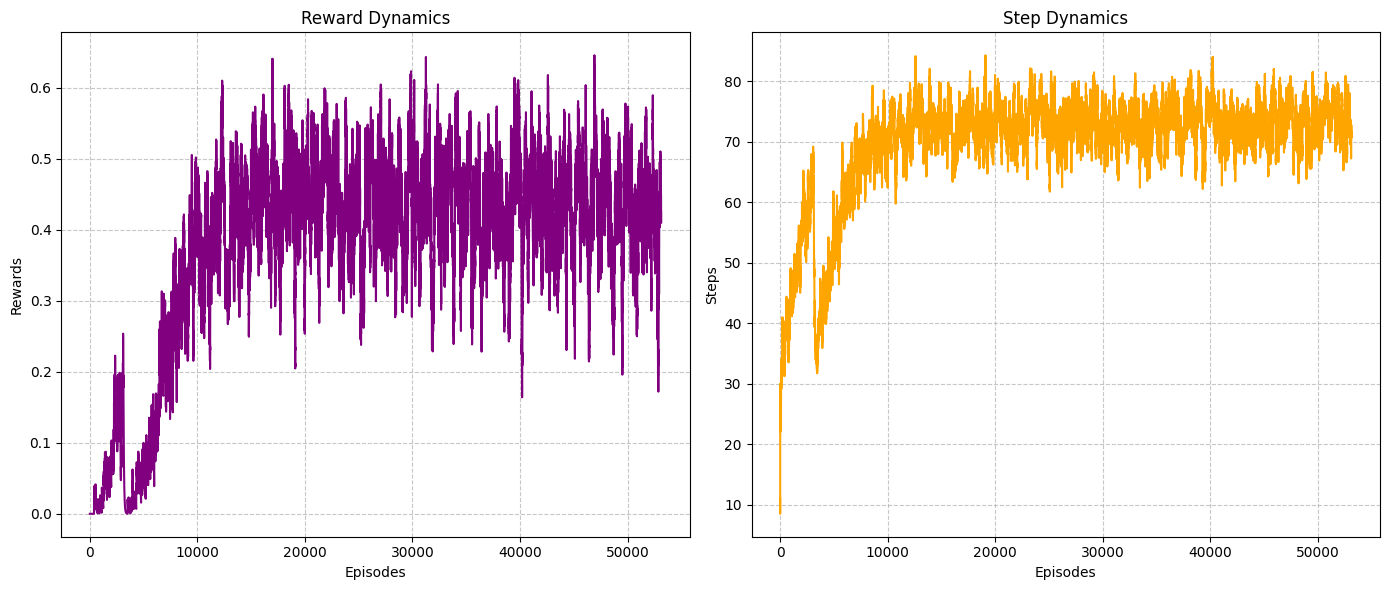

In [22]:
# Visualization
def smooth_data(data, smooth_factor):
    smoothed_values = []
    current = 0

    for i, value in enumerate(data):
        current = smooth_factor * current + (1 - smooth_factor) * value
        if smooth_factor != 1:
            bias_correction = 1 - (smooth_factor ** (i + 1))
            corrected = current / bias_correction
            smoothed_values.append(corrected)
        else:
            smoothed_values.append(current)

    return smoothed_values

smoothing_factor = 0.98
smoothed_rewards = smooth_data(episode_rewards, smoothing_factor)
smoothed_steps = smooth_data(episode_steps, smoothing_factor)

print(f"Number of episodes: {len(episode_rewards)}")
print(f"Smoothed rewards count: {len(smoothed_rewards)}")

episode_numbers = list(range(len(episode_rewards)))
plt.figure(figsize=(14, 6))

# Step count plot
plt.subplot(1, 2, 2)
plt.plot(episode_numbers, smoothed_steps, color="orange")
plt.xlabel("Episodes")
plt.ylabel("Steps")
plt.title("Step Dynamics")
plt.grid(True, linestyle="--", alpha=0.7)

# Reward plot
plt.subplot(1, 2, 1)
plt.plot(episode_numbers, smoothed_rewards, color="purple")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Reward Dynamics")
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
!pip install imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 5.5 MB/s eta 0:00:00


In [23]:
# Agent testing
test_results = []

for test_ep in range(10):
    state, _ = env.reset()
    frames = []
    done = False
    step = 0

    while not done and step < max_steps:
        action = np.argmax(q_grid[state])
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        frames.append(env.render())
        step += 1
    test_results.append(frames)

for test_ep, frames in enumerate(test_results):
    imageio.mimsave(f'/content/drive/MyDrive/Colab Notebooks/agent_frozen_lake/frozenlake_result_{test_ep + 1}.gif', frames, duration=600, loop=0)

env.close()